# Fórmula 1

## Introdução / Introduction


A Fórmula 1 hoje em dia é uma das grandes paixões dos brasileiros nos esportes. <br>
Essa paixão em massa pode ter iniciado com Emerson Fittipaldi lá nos anos 70, quando ele alcançou sua primeira vitória e chegou ao seu primeiro título poucos anos depois, em 1972. E essas histórias podem ser acompanhadas em séries e documentários já publicados sobre as conquistas do brasileiros na F1. Mas falando em dados e indo além dos grandes nomes como: Fittipaldi, Senna e Piquet, quando surgiu **o primeiro brasileiro** na F1? Qual seu desempenho? **Quantos passaram** pela categória? Como é o **histórico geral** do Brasil nessa categória? Várias perguntas não são usualmente respondidas pelas grandes mídias vão ser respondidas aqui.
<br>
--------------
*Formula 1 nowadays is one of the great passions of Brazilians in sports. <br>
This mass passion may have started with Emerson Fittipaldi back in the 70s, when he achieved his first victory and reached his first title a few years later, in 1972. And these stories can be followed in series and documentaries already published about the conquests of the Brazilians in F1. But speaking about data and going beyond the big names like: Fittipaldi, Senna and Piquet, when did **the first Brazilian** appear in F1? What's your performance? **How many passed** the category? How is the **general history** of Brazil in this category? Several questions not usually answered by mainstream media will be answered here.

Como ponto de partida queremos saber:<br>
* Quem foi o primeiro piloto e qual seu desempenho?<br>
* Como foi o Brasil na F1 até alcançar as primeiras vitórias?<br>
* Como é o histórico do Brasil ao longo dos anos?<br>
    
Se estamos lidando com competição<br>
* Qual foi o país mais vencedor na F1?<br>
* Desempenho do País x Desempenho do Brasil<br>
* Quais perguntas podem surgir no meio do caminho?<br>
------------------------
*As a starting point we want to know:* <br>
* *Who was the first pilot and what was his performance?*<br>
* *How was Brazil in F1 until reaching the first victories?*<br>
* *How is the history of Brazil over the years?*<br>

*If we are dealing with competition*<br>
* *What was the most winning country in F1?*<br>
* *ountry Performance x Brazil Performance*<br>
* *What questions may arise along the way?*<br>

## Importando os dados

Os dados estão no dataset "Formula 1 World Championship (1950 - 2022)" disponíveis no site Kaggle.com. <br>
    https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020
    
---------------

*The dataset is "Formula 1 World Championship (1950 - 2022)" avaliable on Kaggle.com.<br>
    https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020*

In [1]:
#Bibliotecas/ Library
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests
import urllib.request

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime as dt

In [2]:
# importando datasets/ import datasets
circuits = pd.read_csv('data/circuits.csv')
constructor_results = pd.read_csv('data/constructor_results.csv')
constructor_standings = pd.read_csv('data/constructor_standings.csv')
constructors = pd.read_csv('data/constructors.csv')
driver_standings = pd.read_csv('data/driver_standings.csv')
drivers = pd.read_csv('data/drivers.csv') #contém datatime ('dob' - day of birth)
lap_times = pd.read_csv('data/lap_times.csv')#contem datatime ('time' - lap time)
pit_stops = pd.read_csv('data/pit_stops.csv')#contem datatime ()
qualifying = pd.read_csv('data/qualifying.csv')#contem datatime ('q1', 'q2', 'q3', qualifying times)
races = pd.read_csv('data/races.csv') #contem datatime 
results = pd.read_csv('data/results.csv') #contem datatime 
seasons = pd.read_csv('data/seasons.csv') #contem datatime 
sprint_results = pd.read_csv('data/sprint_results.csv') #contem datatime 
status = pd.read_csv('data/status.csv') 

A verificar a composição dos datasets importados\ Checking the composition of imported datasets


In [3]:
display('circuits', circuits.head(3), circuits.shape)
display('constructor_results', constructor_results.head(3),constructor_results.shape)
display('constructor_standings', constructor_standings.head(3), constructor_standings.shape)
display('constructors', constructors.head(3), constructors.shape)
display('driver_standings', driver_standings.head(3), driver_standings.shape)
display('drivers', drivers.head(3), drivers.shape)
display('lap_times', lap_times.head(3), lap_times.shape)
display('pit_stops', pit_stops.head(3), pit_stops.shape)
display('qualifying', qualifying.head(3),qualifying.shape)
display('races', races.head(3), races.shape)
display('results', results.head(3), results.shape)
display('seasons', seasons.head(3), seasons.shape)
display('sprint_results', sprint_results.head(3), sprint_results.shape)
display('status', status.head(3), status.shape)

'circuits'

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.7380,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.5106,7,http://en.wikipedia.org/wiki/Bahrain_Internati...


(76, 9)

'constructor_results'

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N


(12080, 5)

'constructor_standings'

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0


(12841, 7)

'constructors'

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...


(211, 5)

'driver_standings'

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0


(33686, 7)

'drivers'

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg


(854, 9)

'lap_times'

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713


(528785, 6)

'pit_stops'

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426


(9299, 7)

'qualifying'

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079


(9395, 9)

'races'

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


(1079, 18)

'results'

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1


(25660, 18)

'seasons'

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...


(73, 2)

'sprint_results'

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1


(100, 16)

'status'

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident


(139, 2)

A verificar quantos brasileiros participaram da F1. No gráfico são mostrados somente os 7 países com mais pilotos. <br> *Checking how many Brazilians participated in F1. Only the 7 countries with the most pilots are shown in the graph.*

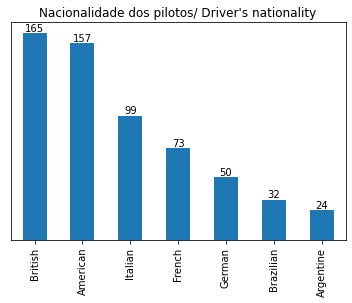

In [56]:
ax = drivers.nationality.value_counts().head(7).plot.bar()
ax.bar_label(ax.containers[0])
plt.yticks([], [])
plt.title("Nacionalidade dos pilotos/ Driver's nationality")
plt.show()

O Brasil já desfilou na F1 com **32** pilotos diferentes, um número expressivo, sendo o 6º país com mais pilotos na categoria. Você imaginou um número tão alto quanto esse? E quem são eles? <br> *Brazil already had in F1 with **32** different pilots, being the 6th country with more pilots in the category. Did you imagine a number as high as that? And who are they?*

Abaixo estão listados os pilotos brasileiros da F1, com o link do en.wikipedia.org que conta detalhes de cada um.  Nome que usou quando pilotou e também seu nome e sobrenome. <br>
*Below are listed the Brazilian F1 drivers, with the en.wikipedia.org link that tells details of each one. Name used when piloting and also your first and last name.*

In [18]:
drivers_br = drivers.query('nationality=="Brazilian"')[['driverId','surname','url']]
name_driv_br = []
name_driv_br = [i.replace('http://en.wikipedia.org/wiki/', '').replace('_', ' ') for i in list(drivers_br.url)]
# drivers_br = drivers_br.rename(columns={'url': 'real_name'})
drivers_br['real_name'] = name_driv_br
drivers_br.iloc[4,3] = 'Antonio Pizzonia'
drivers_br.iloc[14,3] = 'Mauricio Gugelmin'
drivers_br.iloc[24,3] = "Fritz d'Orey"
drivers_br = drivers_br.reset_index(drop=True)
drivers_br

,driverId,surname,url,real_name
0,12,Piquet Jr.,"http://en.wikipedia.org/wiki/Nelson_Piquet,_Jr.","Nelson Piquet, Jr."
1,13,Massa,http://en.wikipedia.org/wiki/Felipe_Massa,Felipe Massa
2,22,Barrichello,http://en.wikipedia.org/wiki/Rubens_Barrichello,Rubens Barrichello
3,41,Zonta,http://en.wikipedia.org/wiki/Ricardo_Zonta,Ricardo Zonta
4,42,Pizzonia,http://en.wikipedia.org/wiki/Ant%C3%B4nio_Pizz...,Antonio Pizzonia
5,43,da Matta,http://en.wikipedia.org/wiki/Cristiano_da_Matta,Cristiano da Matta
6,54,Burti,http://en.wikipedia.org/wiki/Luciano_Burti,Luciano Burti
7,58,Marques,http://en.wikipedia.org/wiki/Tarso_Marques,Tarso Marques
8,59,Bernoldi,http://en.wikipedia.org/wiki/Enrique_Bernoldi,Enrique Bernoldi
9,64,Diniz,http://en.wikipedia.org/wiki/Pedro_Diniz,Pedro Diniz


Obtendo as fotos de cada piloto pelo wikipedia.
<br> 
**#Construir um quadro com a foto dos pilotos**

In [6]:
wikip_list = list(drivers_br.url)

In [24]:
number=list(drivers_br.driverId)
for i, j in zip(wikip_list, number):
    response = requests.get(i)
    soup = BeautifulSoup(response.content, 'html.parser')
    images = soup.find('a', attrs = {'class': 'image'})
    for image in images:
        image_src = image['src']
        urllib.request.urlretrieve(image_src.replace('//', 'https://'), "Pictures/"+str(j)+'.jpeg')
#         number+=1

Será que houve alguma equipe brasileira? Vamos ver... <br>
*Was there a Brazilian team? We will see...*

In [10]:
constructors.query('nationality=="Brazilian"')

,constructorId,constructorRef,name,nationality,url
54,56,fittipaldi,Fittipaldi,Brazilian,http://en.wikipedia.org/wiki/Fittipaldi_%28con...


Em reportagem para o globo.com Emerson Fittipaldi fala sobre a equipe que fundou junto com o irmão Wilsinho, a Copersucar-Fittipaldi:
<br> 
- "Foi um projeto espetacular, que para nós, na época, me motivou muito, ter uma equipe brasileira de Fórmula 1. Pena que no final a gente não tinha mais patrocínio para continuar."
<br>

*In a report for globo.com Emerson Fittipaldi talks about the team he founded with his brother Wilsinho, the Copersucar-Fittipaldi:* <br>
- "*It was a spectacular project, which for us, at the time, motivated me a lot, having a Brazilian Formula 1 team. Too bad that in the end we didn't have more sponsorship to continue.*"

A equipe foi fundada em 1975 e sua estreia ocorreu no GP da Argentina, com Wilson Fittipaldi Jr. Ela contou com diversos pilotos brasileiros:
<br> *The team was founded in 1975 and its debut took place at the Argentine GP, with Wilson Fittipaldi Jr. It had several Brazilian pilots*
   - Wilson Fittipaldi Jr (1975)
   - Emerson FIttipaldi (1976-1980)
   - Ingo Hoffmann (1976-1977)
   - Alex Dias Ribeiro (1979)
   - Chico Serra (1981-1982)
   <br>
   
E também com nomes internacionais: / *And also with international names:*
   - Arturo Merzario (1975, Italiano)
   - Keke Rosberg (1980, Finlandês, e que veio a ser campeão da F1 em 1982 pela Williams / *who became F1 champion in 1982 with Williams Team*)

No entanto a equipe não teve um desempenho muito bom, marcando somente 44 pontos em 8 temporadas e esteve presente em 119 corridas. E seus melhores resultados foram com Emerson Fittipaldi, que conseguiu um terceiro lugar no Grande Prêmio do Oeste dos Estados Unidos de 1980, onde largou na  24ª posicão (último), e um segundo lugar no Grande Prêmio do Brasil de 1978, nessa ocasião largou na 7ª posição.<br><br>
*The team did not perform very well, scoring only 44 points in 8 seasons and was present in 119 races. And his best results were with Emerson Fittipaldi, who managed a third place in the Grand Prix of the West of the United States of 1980, where he started in the 24th position (last), and a second place in the Grand Prix of Brazil of 1978, on that occasion he started in the 7th position*

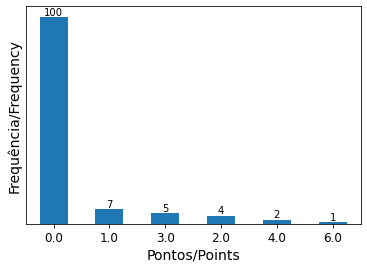

In [55]:
ax= constructor_results.query('constructorId==56').points.value_counts().plot.bar()
ax.bar_label(ax.containers[0])
ax.set_ylabel("Frequência/Frequency",fontsize=14)
ax.set_xlabel("Pontos/Points",fontsize=14)
plt.xticks(rotation=0, size=12)
plt.yticks([], [])
plt.show()

In [ ]:
con